<a href="https://colab.research.google.com/github/hanxu49/2020-NLP-Final/blob/master/4_keras_ep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/"My Drive"/Design

#### **数据预处理** 

In [ ]:
import pandas as pd
df = pd.read_csv('./data/rumor.text_seg.pos_tags.csv',encoding="gb18030",index_col=0)
df = df.dropna(axis=0,how='any')
print(df.shape)
df.head(2)

(9066, 5)


,title,content,type,text,text_cut
0,辟谣 | 温岭大溪从武汉回来一千多人，被公安局全抓走？ 造谣者已被拘留！,1月24日，台州网警工作发现有网民在微信群称：“大溪从武汉回来一千多人，被...,1,辟谣 | 温岭大溪从武汉回来一千多人，被公安局全抓走？ 造谣者已被拘留！ 1...,辟谣/nr |/x 温岭/ns 大溪/ns 从/p 武汉/ns 回来/v 一千多/m 人/n...
1,陇南全市红灯？不存在的！,近日，陇南不少微信群都在转发一则内容为“……通知，市县各城区内，于今日凌晨...,1,陇南全市红灯？不存在的！ 近日，陇南不少微信群都在转发一则内容为“……通知，...,陇南/ns 全市/n 红灯/n ？/x 不/d 存在/v 的/uj ！/x 近日/t ，/x...


In [ ]:
labels= list(df.type)
len(labels)

9066

In [ ]:
lines = [line for line in df.text_cut]
words = []  # 句子
pos_tags = []  # 词性标记类型
for line in lines:
  sentence = line.split(',')[-1].strip()
  # print(sentence)
  words_tags = sentence.split(' ')
  words_temp, tag_temp = [], []
  # print(words_tags)
  for item in words_tags:
    # print(item)
    word, tag = item.split('/')[0], item.split('/')[-1]
    words_temp.append(word)
    tag_temp.append(tag)
  pos_tags.append(tag_temp)
  words.append(words_temp)

In [ ]:
# len(words)
print(words[0:2])
# words[0]

[['辟谣', '|', '温岭', '大溪', '从', '武汉', '回来', '一千多', '人', '，', '被', '公安局', '全', '抓走', '？', '造谣', '者', '已', '被', '拘留', '！', '1', '月', '24', '日', '，', '台州', '网警', '工作', '发现', '有', '网民', '在', '微信', '群称', '：', '“', '大溪', '从', '武汉', '回来', '一千多', '人', '，', '被', '公安局', '全', '抓走', '，', '需', '隔离', '15', '天', '，', '政府', '包', '了', '10', '个', '宾馆', '。', '”', '台州', '网警', '迅速', '与', '属地', '核实', '。', '经', '核实', '，', '大溪镇', '并', '无', '此事', '，', '该', '网民', '言论', '...', '全文'], ['陇南', '全市', '红灯', '？', '不', '存在', '的', '！', '近日', '，', '陇南', '不少', '微', '信群', '都', '在', '转发', '一则', '内容', '为', '“', '…', '…', '通知', '，', '市县', '各', '城区', '内', '，', '于', '今日', '凌晨', '24', '后', '所有', '路口', '红绿灯', '，', '统一', '24', '小时', '改', '红灯', '，', '除', '特种', '车辆', '外', '，', '私家车', '闯', '一次', '6', '分', '200', '，', '禁止', '私家', '车辆', '出行', '，', '正常', '行驶', '，', '另行通知', '。', '（', '请', '大家', '踊', '...', '全文']]


In [ ]:
import re
pattern="[\u4e00-\u9fa5]+" 
regex = re.compile(pattern)
def cn_only(s): 
    result = regex.findall(s)
    te = "".join([wd for wd in result])
    return te

In [ ]:
char_lines = [line for line in df.text]
chars = []
for line in char_lines:
  lst = []
  line = cn_only(line)
  for word in line:
    if word:
      lst.append(word)
  chars.append(lst)

#### **句子长度**

**word2vec**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
len_stac = []
for line in lines:
  lst = line.split()
  len_stac.append(len(lst))

X = []
Y = []
for x,y in enumerate(len_stac):
  X.append(x)
  Y.append(y)

In [ ]:
np.mean(Y)
len_stac[0]

82

No handles with labels found to put in legend.


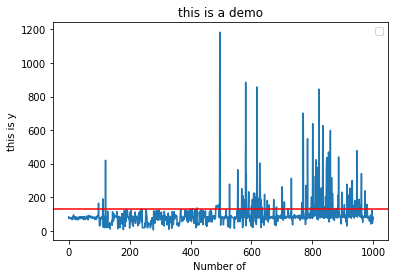

In [ ]:
Y_mean = np.mean(Y)
plt.plot(np.asarray(X[:1000]),np.asarray(Y[:1000]))
plt.xlabel('Number of ')
plt.ylabel('this is y')
plt.title('this is a demo')
plt.legend() # 将样例显示出来
plt.axhline(y = np.mean(Y), color="red")
plt.show()

**char2vec**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
len_stac = []
for line in char_lines:
  length = len(line)
  len_stac.append(length)

X = []
Y = []
for x,y in enumerate(len_stac):
  X.append(x)
  Y.append(y)

In [ ]:
np.mean(Y)
Y[0]

141

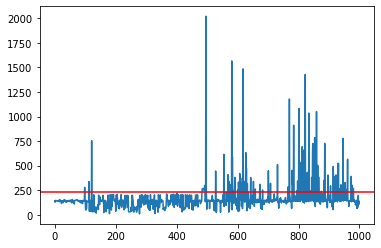

In [ ]:
Y_mean = np.mean(Y)
plt.plot(np.asarray(X[:1000]),np.asarray(Y[:1000]))
plt.axhline(y = np.mean(Y), color="red")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

word_stac,char_stac = [],[]

for wo,ch in zip(lines,char_lines):
  lst1 = wo.split()
  word_stac.append(len(lst1))
  char_stac.append(len(ch))

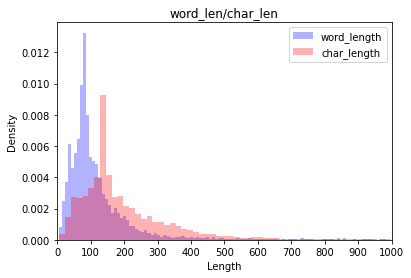

In [ ]:
plt.figure()
plt.title("word_len/char_len")
plt.xlabel("Length")
plt.ylabel("Density")
_, _, word = plt.hist(word_stac, bins=250, alpha=.3,density=True,color='b')
# plt.subplot(122)
_, _, char = plt.hist(char_stac, bins=250, alpha=.3,density=True,color='r')

x_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-2,1000)
plt.legend([word[0], char[0]], ['word_length', 'char_length'], loc = 'best')
plt.savefig("./photos/word_len-char_len.png")
plt.show()

#### **模型构建**

In [ ]:
import numpy as np
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 200
maxlen_char = 300
max_words = 15000
validation_split = 0.16
test_split = 0.2

In [ ]:
corpus_word = words # words
corpus_tag = pos_tags # pos_tags
corpus_char = chars # chars

In [ ]:
tokenizer_word = Tokenizer(num_words=max_words)
tokenizer_word.fit_on_texts(corpus_word)
sequences_word = tokenizer_word.texts_to_sequences(corpus_word)

tokenizer_tag = Tokenizer(num_words=max_words)
tokenizer_tag.fit_on_texts(corpus_tag)
sequences_tag = tokenizer_tag.texts_to_sequences(corpus_tag)

tokenizer_char = Tokenizer(num_words=max_words)
tokenizer_char.fit_on_texts(corpus_char)
sequences_char = tokenizer_char.texts_to_sequences(corpus_char)

In [ ]:
len(sequences_char[0])

104

In [ ]:
data_word = pad_sequences(sequences_word, maxlen=maxlen)
data_tag = pad_sequences(sequences_tag, maxlen=maxlen)
data_char = pad_sequences(sequences_char, maxlen=maxlen_char)

In [ ]:
len(data_word)

9066

In [ ]:
word_index_word = tokenizer_word.word_index
word_index_tag = tokenizer_tag.word_index
word_index_char = tokenizer_char.word_index

In [ ]:
labels = np.array(labels)

In [ ]:
#shuffle
np.random.seed(100)
indices = np.arange(data_word.shape[0])
np.random.shuffle(indices)
data_word = data_word[indices]
data_tag = data_tag[indices]
data_char = data_char[indices]
data_index = data_word[indices]
labels = labels[indices]

In [ ]:
data_doc = [[item] for item in indices]
data_doc = np.array(data_doc) 
len(data_doc)

9066

In [ ]:
# data_in = sequences_word[:]

In [ ]:
p1 = int(len(data_word)*(1-validation_split-test_split))
p2 = int(len(data_word)*(1-test_split))

x_train_w = data_word[:p1]
y_train_w = labels[:p1]
x_valid_w = data_word[p1:p2]
y_valid_w = labels[p1:p2]
x_test_w = data_word[p2:]
y_test_w = labels[p2:]

x_train_t = data_tag[:p1]
y_train_t = labels[:p1]
x_valid_t = data_tag[p1:p2]
y_valid_t = labels[p1:p2]
x_test_t = data_tag[p2:]
y_test_t = labels[p2:]

x_train_c = data_char[:p1]
y_train_c = labels[:p1]
x_valid_c = data_char[p1:p2]
y_valid_c = labels[p1:p2]
x_test_c = data_char[p2:]
y_test_c = labels[p2:]

x_train_d = data_doc[:p1]
y_train_d = labels[:p1]
x_valid_d = data_doc[p1:p2]
y_valid_d = labels[p1:p2]
x_test_d = data_doc[p2:]
y_test_d = labels[p2:]

x_train_i = data_index[:p1]
y_train_i = labels[:p1]
x_valid_i = data_index[p1:p2]
y_valid_i = labels[p1:p2]
x_test_i = data_index[p2:]
y_test_i = labels[p2:]

print ('train docs: ',str(len(x_train_w)),str(len(x_train_t)),str(len(x_train_c)))
print ('val docs: ',str(len(x_valid_w)),str(len(x_valid_t)),str(len(x_valid_c)))
print ('test docs:',str(len(x_test_w)),str(len(x_test_t)),str(len(x_test_c)))

train docs:  5802 5802 5802
val docs:  1450 1450 1450
test docs: 1814 1814 1814


In [ ]:
sum(y_train_i)
# y_train_i.shape

2903

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
embed_word_model = KeyedVectors.load('./embedding/word2vec.vec')
embed_word_dim = len(embed_word_model[next(iter(embed_word_model.wv.vocab))])
embed_word_dim

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


256

In [ ]:
embed_char_model = KeyedVectors.load('./embedding/char2vec.vec')
embed_char_dim = len(embed_char_model[next(iter(embed_char_model.wv.vocab))])
embed_char_dim

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


256

In [ ]:
embed_doc_model = KeyedVectors.load('./embedding/doc2vec.vec')
embed_doc_dim = len(embed_doc_model[next(iter(embed_doc_model.wv.vocab))])
embed_doc_dim

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


256

In [ ]:
embed_tag_dim = 256
embedding_tag_matrix = np.random.rand(max_words, embed_tag_dim)
embedding_tag_matrix.shape

(15000, 256)

In [ ]:
embedding_word_matrix = np.random.rand(max_words, embed_word_dim)
# embedding_matrix = (embedding_matrix - 0.5) * 2
for word, i in word_index_word.items():
    if i < max_words:
        try:
          embedding_word_vector = embed_word_model.get_vector(word)
          embedding_word_matrix[i] = embedding_word_vector
        except:
          pass

In [ ]:
embedding_char_matrix = np.random.rand(max_words, embed_char_dim)
# embedding_matrix = (embedding_matrix - 0.5) * 2
for word, i in word_index_char.items():
    if i < max_words:
        try:
          embedding_char_vector = embed_char_model.get_vector(word)
          embedding_char_matrix[i] = embedding_char_vector
        except:
          pass

In [ ]:
embedding_doc_matrix = np.random.rand(max_words, embed_doc_dim)
# embedding_matrix = (embedding_matrix - 0.5) * 2
for i in range(0,len(data_doc)):
    if i < max_words:
        try:
          embedding_doc_vector = embed_doc_model.docvecs[i]
          embedding_doc_matrix[i] = embedding_doc_vector
        except:
          pass

In [ ]:
len(data_char[0])

300

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
# Clear any logs from previous runs
!rm -rf ./logs/ 

TensorFlow version:  2.2.0-rc3


**CNN**

In [ ]:
# 模型结构：词嵌入-卷积池化-全连接---拼接-全连接
from keras import regularizers
from tensorflow.python.keras.layers import Embedding,GRU,BatchNormalization,Activation
from tensorflow.python.keras.layers import Dense, Input, Flatten, Dropout, concatenate, LSTM, Bidirectional,Concatenate
from tensorflow.python.keras.layers import Conv1D, Convolution1D, MaxPooling1D, Embedding, GlobalMaxPooling1D
from tensorflow.python.keras.models import Sequential,Model

import numpy as np
np.random.seed(10)

word_input = Input(shape=(maxlen,), dtype='float64')
tag_input = Input(shape=(maxlen,), dtype='float64')
char_input = Input(shape=(maxlen_char,), dtype='float64')
doc_input = Input(shape=(1,), dtype='float64')

embedding_layer_word = Embedding(max_words,embed_word_dim,weights=[embedding_word_matrix],input_length=maxlen,trainable=False)(word_input)
embedding_layer_tag = Embedding(max_words,embed_tag_dim,weights=[embedding_tag_matrix],input_length=maxlen,trainable=True)(tag_input)
embedding_layer_char = Embedding(max_words,embed_char_dim,weights=[embedding_char_matrix],input_length=maxlen_char,trainable=False)(char_input)
embedding_layer_doc = Embedding(max_words,embed_doc_dim,weights=[embedding_doc_matrix],input_length=1,trainable=False)(doc_input)

cnn0 = Convolution1D(256, 3, padding='same', strides = 1)(embedding_layer_word)
cnn0 = BatchNormalization()(cnn0)
cnn0 = Activation("relu")(cnn0)
cnn0 = MaxPooling1D(pool_size=4)(cnn0)
cnn0 = Dropout(0.3)(cnn0)
cnn0 = Flatten()(cnn0)
cnn0 = Dense(16)(cnn0)

cnn1 = Convolution1D(256, 3, padding='same', strides = 1)(embedding_layer_tag)
cnn1 = BatchNormalization()(cnn1)
cnn1 = Activation("relu")(cnn1)
cnn1 = MaxPooling1D(pool_size=4)(cnn1)
cnn1 = Dropout(0.3)(cnn1)
cnn1 = Flatten()(cnn1)
cnn1 = Dense(16)(cnn1)

cnn2 = Convolution1D(256, 3, padding='same', strides = 1)(embedding_layer_char)
cnn2 = BatchNormalization()(cnn2)
cnn2 = Activation("relu")(cnn2)
cnn2 = MaxPooling1D(pool_size=4)(cnn2)
cnn2 = Dropout(0.3)(cnn2)
cnn2 = Flatten()(cnn2)
cnn2 = Dense(16)(cnn2)

cnn3 = Convolution1D(256, 3, padding='same', strides = 1)(embedding_layer_doc)
cnn3 = BatchNormalization()(cnn3)
cnn3 = Activation("relu")(cnn3)
cnn3 = MaxPooling1D(pool_size=1)(cnn3)
cnn3 = Dropout(0.3)(cnn3)
cnn3 = Flatten()(cnn3)
cnn3 = Dense(16)(cnn3)

con = concatenate([cnn0,cnn1,cnn2,cnn3], axis=-1)
print(con)
main_output = Dense(1, activation='sigmoid')(con)###cnn0
print(main_output)
model = Model(inputs = [word_input,tag_input,char_input,doc_input], outputs = main_output)
# model = Model(inputs = [word_input], outputs = main_output) ###only word2vec
# model.summary()

Using TensorFlow backend.


Tensor("concatenate/Identity:0", shape=(None, 64), dtype=float32)
Tensor("dense_4/Identity:0", shape=(None, 1), dtype=float32)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define the Keras TensorBoard callback.
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit([x_train_w,x_train_t,x_train_c,x_train_d],y_train_w,
           batch_size=64,
           epochs=12,
          #  shuffle=False,
          #  verbose=1,
          #  callbacks=[tensorboard_callback],
           validation_data=([x_valid_w,x_valid_t,x_valid_c,x_valid_d], y_valid_w))

# history = model.fit([x_train_w],y_train_w,batch_size=64,epochs=12,#callbacks=[tensorboard_callback],
#            validation_data=([x_valid_w], y_valid_w)) ###only word2vec

Epoch 1/12
91/91 [==============================] - 10s 114ms/step - loss: 2.6012 - accuracy: 0.6798 - val_loss: 0.3250 - val_accuracy: 0.8662
Epoch 2/12
91/91 [==============================] - 10s 104ms/step - loss: 0.3662 - accuracy: 0.8719 - val_loss: 0.3342 - val_accuracy: 0.8600
Epoch 3/12
91/91 [==============================] - 10s 104ms/step - loss: 0.2796 - accuracy: 0.9061 - val_loss: 0.2092 - val_accuracy: 0.9172
Epoch 4/12
91/91 [==============================] - 9s 103ms/step - loss: 0.1919 - accuracy: 0.9390 - val_loss: 0.4113 - val_accuracy: 0.9000
Epoch 5/12
91/91 [==============================] - 10s 105ms/step - loss: 0.0954 - accuracy: 0.9657 - val_loss: 0.2606 - val_accuracy: 0.9324
Epoch 6/12
91/91 [==============================] - 9s 103ms/step - loss: 0.0923 - accuracy: 0.9681 - val_loss: 0.4913 - val_accuracy: 0.8821
Epoch 7/12
91/91 [==============================] - 10s 105ms/step - loss: 0.0912 - accuracy: 0.9697 - val_loss: 0.2205 - val_accuracy: 0.9359
E

In [ ]:
# %tensorboard --logdir logs

In [ ]:
model.evaluate([x_test_w, x_test_t, x_test_c, x_test_d], y_test_w)
# model.evaluate([x_test_w], y_test_w) ###only word2vec

57/57 [==============================] - 1s 18ms/step - loss: 0.7047 - accuracy: 0.8760


[0.7046954035758972, 0.8759647011756897]

In [ ]:
y_pred = model.predict([x_test_w, x_test_t, x_test_c, x_test_d], batch_size=32, verbose=1)
# y_pred = model.predict([x_test_w], batch_size=64, verbose=1) ###only word2vec

57/57 [==============================] - 1s 15ms/step


In [ ]:
from sklearn.metrics import classification_report
def eval(pred):
  lst = []
  for item in pred:
    if item>=0.5:
      lst.append(1)
    else:
      lst.append(0)
  res = np.array(lst)
  return res

# y_pred = model.predict([x_test_w, x_test_t, x_test_c, x_test_d], batch_size=64, verbose=1)
y_pred_c = eval(y_pred)
print(classification_report(y_test_c, y_pred_c,digits=4))

              precision    recall  f1-score   support

           0     0.9858    0.7637    0.8607       910
           1     0.8061    0.9889    0.8882       904

    accuracy                         0.8760      1814
   macro avg     0.8960    0.8763    0.8745      1814
weighted avg     0.8963    0.8760    0.8744      1814



In [ ]:
from keras.models import load_model
model.save('./model/model_ep1_content.h5')  # creates a HDF5 file 'my_model.h5'

# identical to the previous one
# model = load_model('./model/model_ep1.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./model/model_ep1.h5')